In [1]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /app/Co-DETR/demo


In [3]:
# https://drive.google.com/file/d/1mYoscJk00Q0KSLxW6ndg9on3o55TCfcg/view?usp=drive_link # LVIS - CoDINO SwinL
# https://drive.google.com/file/d/16GTypE-VpvWOPxbK0OxKOj0twvA5dq0L/view?usp=drive_link # COCO - CoDINO SwinL

!mkdir -p {HOME}/Co-DETR/projects/ckpts

# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mYoscJk00Q0KSLxW6ndg9on3o55TCfcg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mYoscJk00Q0KSLxW6ndg9on3o55TCfcg" -O /app/Co-DETR/projects/ckpts/co_dino_5scale_lsj_swin_large_3x_lvis.pth && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16GTypE-VpvWOPxbK0OxKOj0twvA5dq0L' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16GTypE-VpvWOPxbK0OxKOj0twvA5dq0L" -O /app/Co-DETR/projects/ckpts/co_dino_5scale_lsj_swin_large_3x_coco.pth && rm -rf /tmp/cookies.txt

--2023-09-06 11:57:44--  https://docs.google.com/uc?export=download&confirm=t&id=16GTypE-VpvWOPxbK0OxKOj0twvA5dq0L
Resolving docs.google.com (docs.google.com)... 74.125.131.194, 2a00:1450:4010:c01::c2
Connecting to docs.google.com (docs.google.com)|74.125.131.194|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7i2muovsgt9hooucgf9ra5csal8ksafv/1694001450000/12023412550722271616/*/16GTypE-VpvWOPxbK0OxKOj0twvA5dq0L?e=download&uuid=ffacd5e0-4350-4137-b5f9-f99ebb48a2f8 [following]
--2023-09-06 11:57:44--  https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7i2muovsgt9hooucgf9ra5csal8ksafv/1694001450000/12023412550722271616/*/16GTypE-VpvWOPxbK0OxKOj0twvA5dq0L?e=download&uuid=ffacd5e0-4350-4137-b5f9-f99ebb48a2f8
Resolving doc-0o-bg-docs.googleusercontent.com (doc-0o-bg-docs.googleusercontent.com)... 64.233.165.132, 2a00:1450:401

In [5]:
%cd {HOME}/.. 
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
%cd {HOME}

/app/Co-DETR
/app/Co-DETR/demo


In [18]:
config_file = "/app/Co-DETR/projects/configs/co_dino/co_dino_5scale_swin_large_3x_coco.py" #'../configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = "/app/Co-DETR/projects/ckpts/co_dino_5scale_lsj_swin_large_3x_lvis.pth" #'../checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [19]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:694: DeprecationWarning: The arguments `feedforward_channels` in BaseTransformerLayer has been deprecated, now you should set `feedforward_channels` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'to a dict named `ffn_cfgs`. ', DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:694: DeprecationWarning: The arguments `ffn_dropout` in BaseTransformerLayer has been deprecated, now you should set `ffn_drop` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'to a dict named `ffn_cfgs`. ', DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:694: DeprecationWarning: The arguments `ffn_num_fcs` in BaseTransformerLayer has been deprecated, now you should set `num_fcs` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'to a dict named `ffn_cfgs`. ', DeprecationWarning)
/opt/conda/lib/python3.7/site-packages

The model and loaded state dict do not match exactly

size mismatch for query_head.cls_branches.0.weight: copying a param with shape torch.Size([1203, 256]) from checkpoint, the shape in current model is torch.Size([80, 256]).
size mismatch for query_head.cls_branches.0.bias: copying a param with shape torch.Size([1203]) from checkpoint, the shape in current model is torch.Size([80]).
size mismatch for query_head.cls_branches.1.weight: copying a param with shape torch.Size([1203, 256]) from checkpoint, the shape in current model is torch.Size([80, 256]).
size mismatch for query_head.cls_branches.1.bias: copying a param with shape torch.Size([1203]) from checkpoint, the shape in current model is torch.Size([80]).
size mismatch for query_head.cls_branches.2.weight: copying a param with shape torch.Size([1203, 256]) from checkpoint, the shape in current model is torch.Size([80, 256]).
size mismatch for query_head.cls_branches.2.bias: copying a param with shape torch.Size([1203]) from chec

/app/Co-DETR/mmdet/apis/inference.py:52: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [20]:
# test a single image
img = 'demo.jpg'
result = inference_detector(model, img)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/app/Co-DETR/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


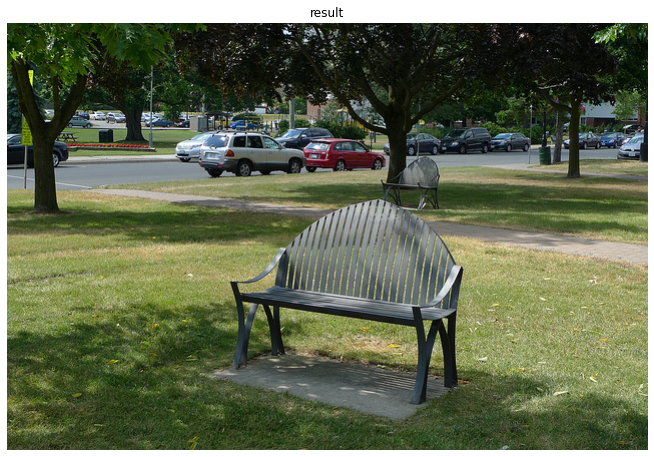

In [21]:
# show the results
show_result_pyplot(model, img, result)